# 分析常錯題目間的關係

1. 導入函式庫

In [25]:
from configparser import ConfigParser
import pandas as pd
import matplotlib.pyplot as plt
from Model.SelectFrequentItems import SelectFrequentItems
from MakeFile.FileSaver import FileSaver

2. 導入資料位置

In [26]:
_configPath = "config.ini"
_config = ConfigParser()
_config.read(_configPath)
_selectFrequentItems = SelectFrequentItems()

3. 區分初階與進階題目

In [27]:
_contentDf = pd.read_csv(_config["Paths"]["PROBLEM_CONTENT_PATH"])

_dfsDict = _selectFrequentItems.DivideDataFrame(_contentDf)

保存

In [28]:
FileSaver.SaveDataframe(_dfsDict["elementary"], _config["Paths"]["ELEMENTARY_PROBLEM_CONTENT_PATH"])
FileSaver.SaveDataframe(_dfsDict["junior"], _config["Paths"]["JUNIOR_PROBLEM_CONTENT_PATH"])

4. 資料整理

In [29]:
_logProblemDf = pd.read_csv(_config["Paths"]["LOG_PROBLEM_PATH"])

_elementaryGroupedDf = _selectFrequentItems.ReshapeFrame(_logProblemDf, _dfsDict["elementary"])
_juinorGroupedDf = _selectFrequentItems.ReshapeFrame(_logProblemDf, _dfsDict["junior"])

Reshape...: 100%|██████████| 67774/67774 [00:48<00:00, 1396.74it/s]


保存

In [30]:
FileSaver.SaveDataframe(_elementaryGroupedDf, _config["Paths"]["ELEMENTARY_LOG_PROBLEM_PATH"])
FileSaver.SaveDataframe(_juinorGroupedDf, _config["Paths"]["JUNIOR_LOG_PROBLEM_PATH"])

5. 統計題目出現次數

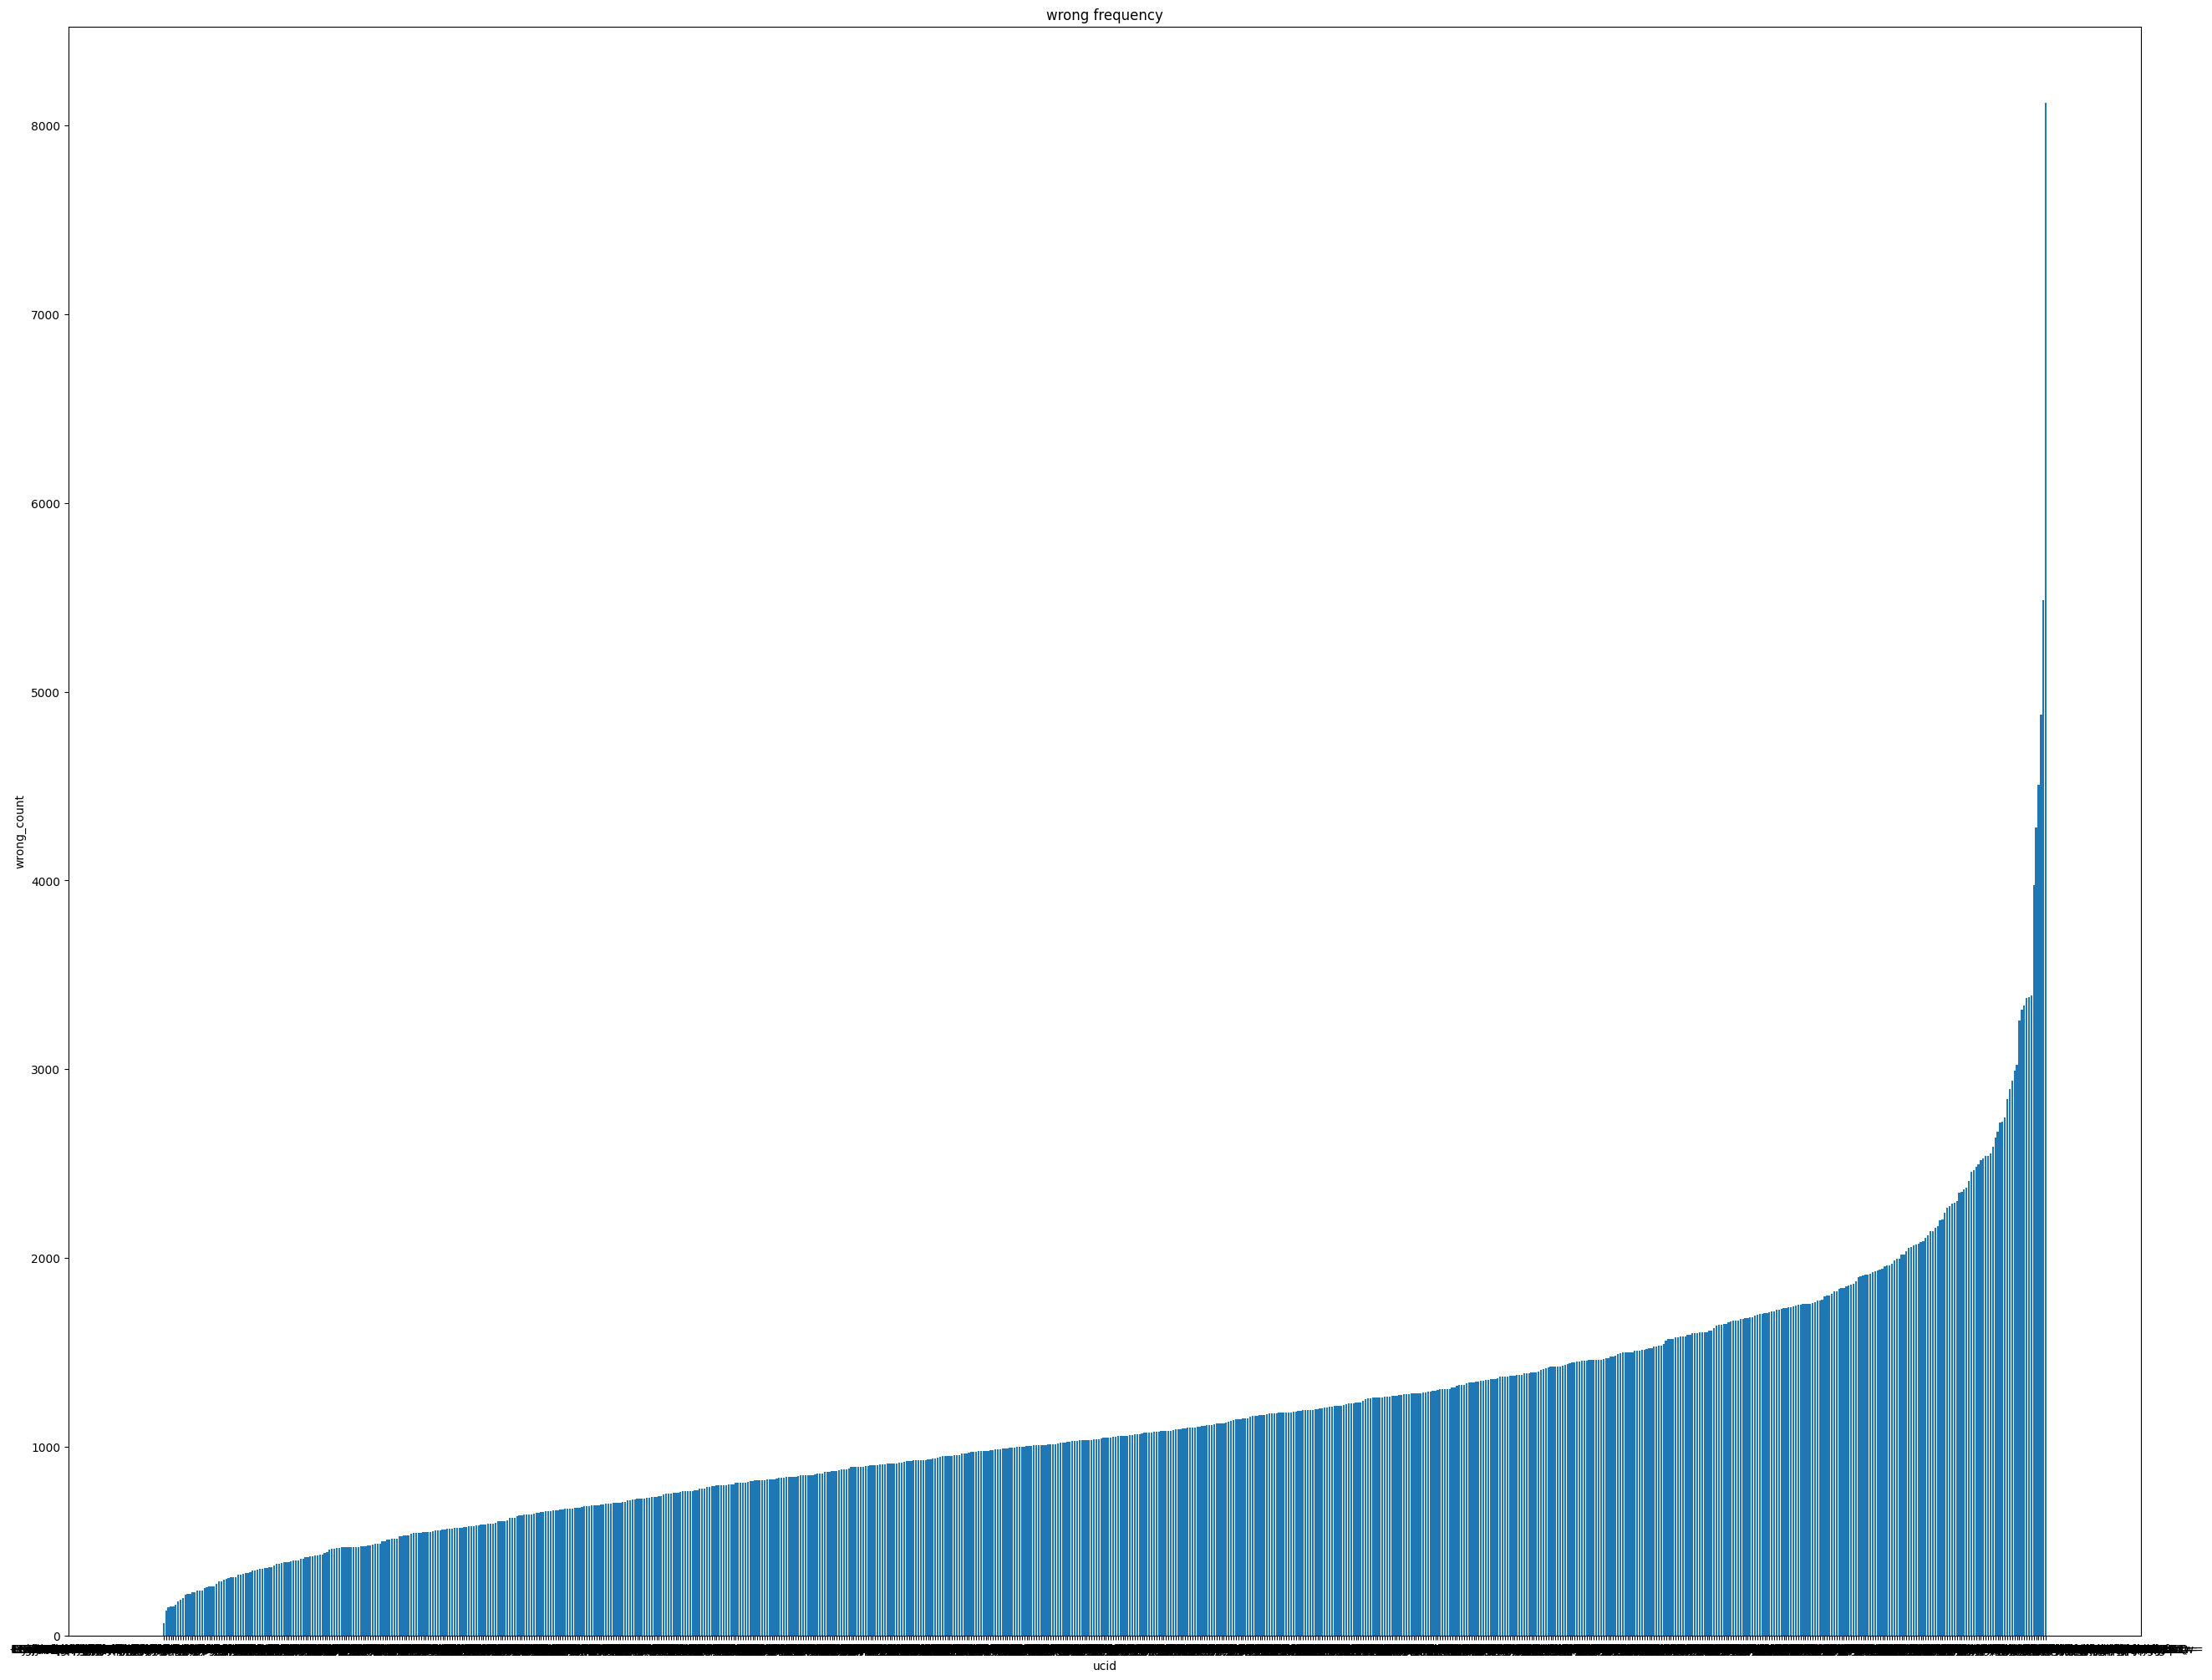

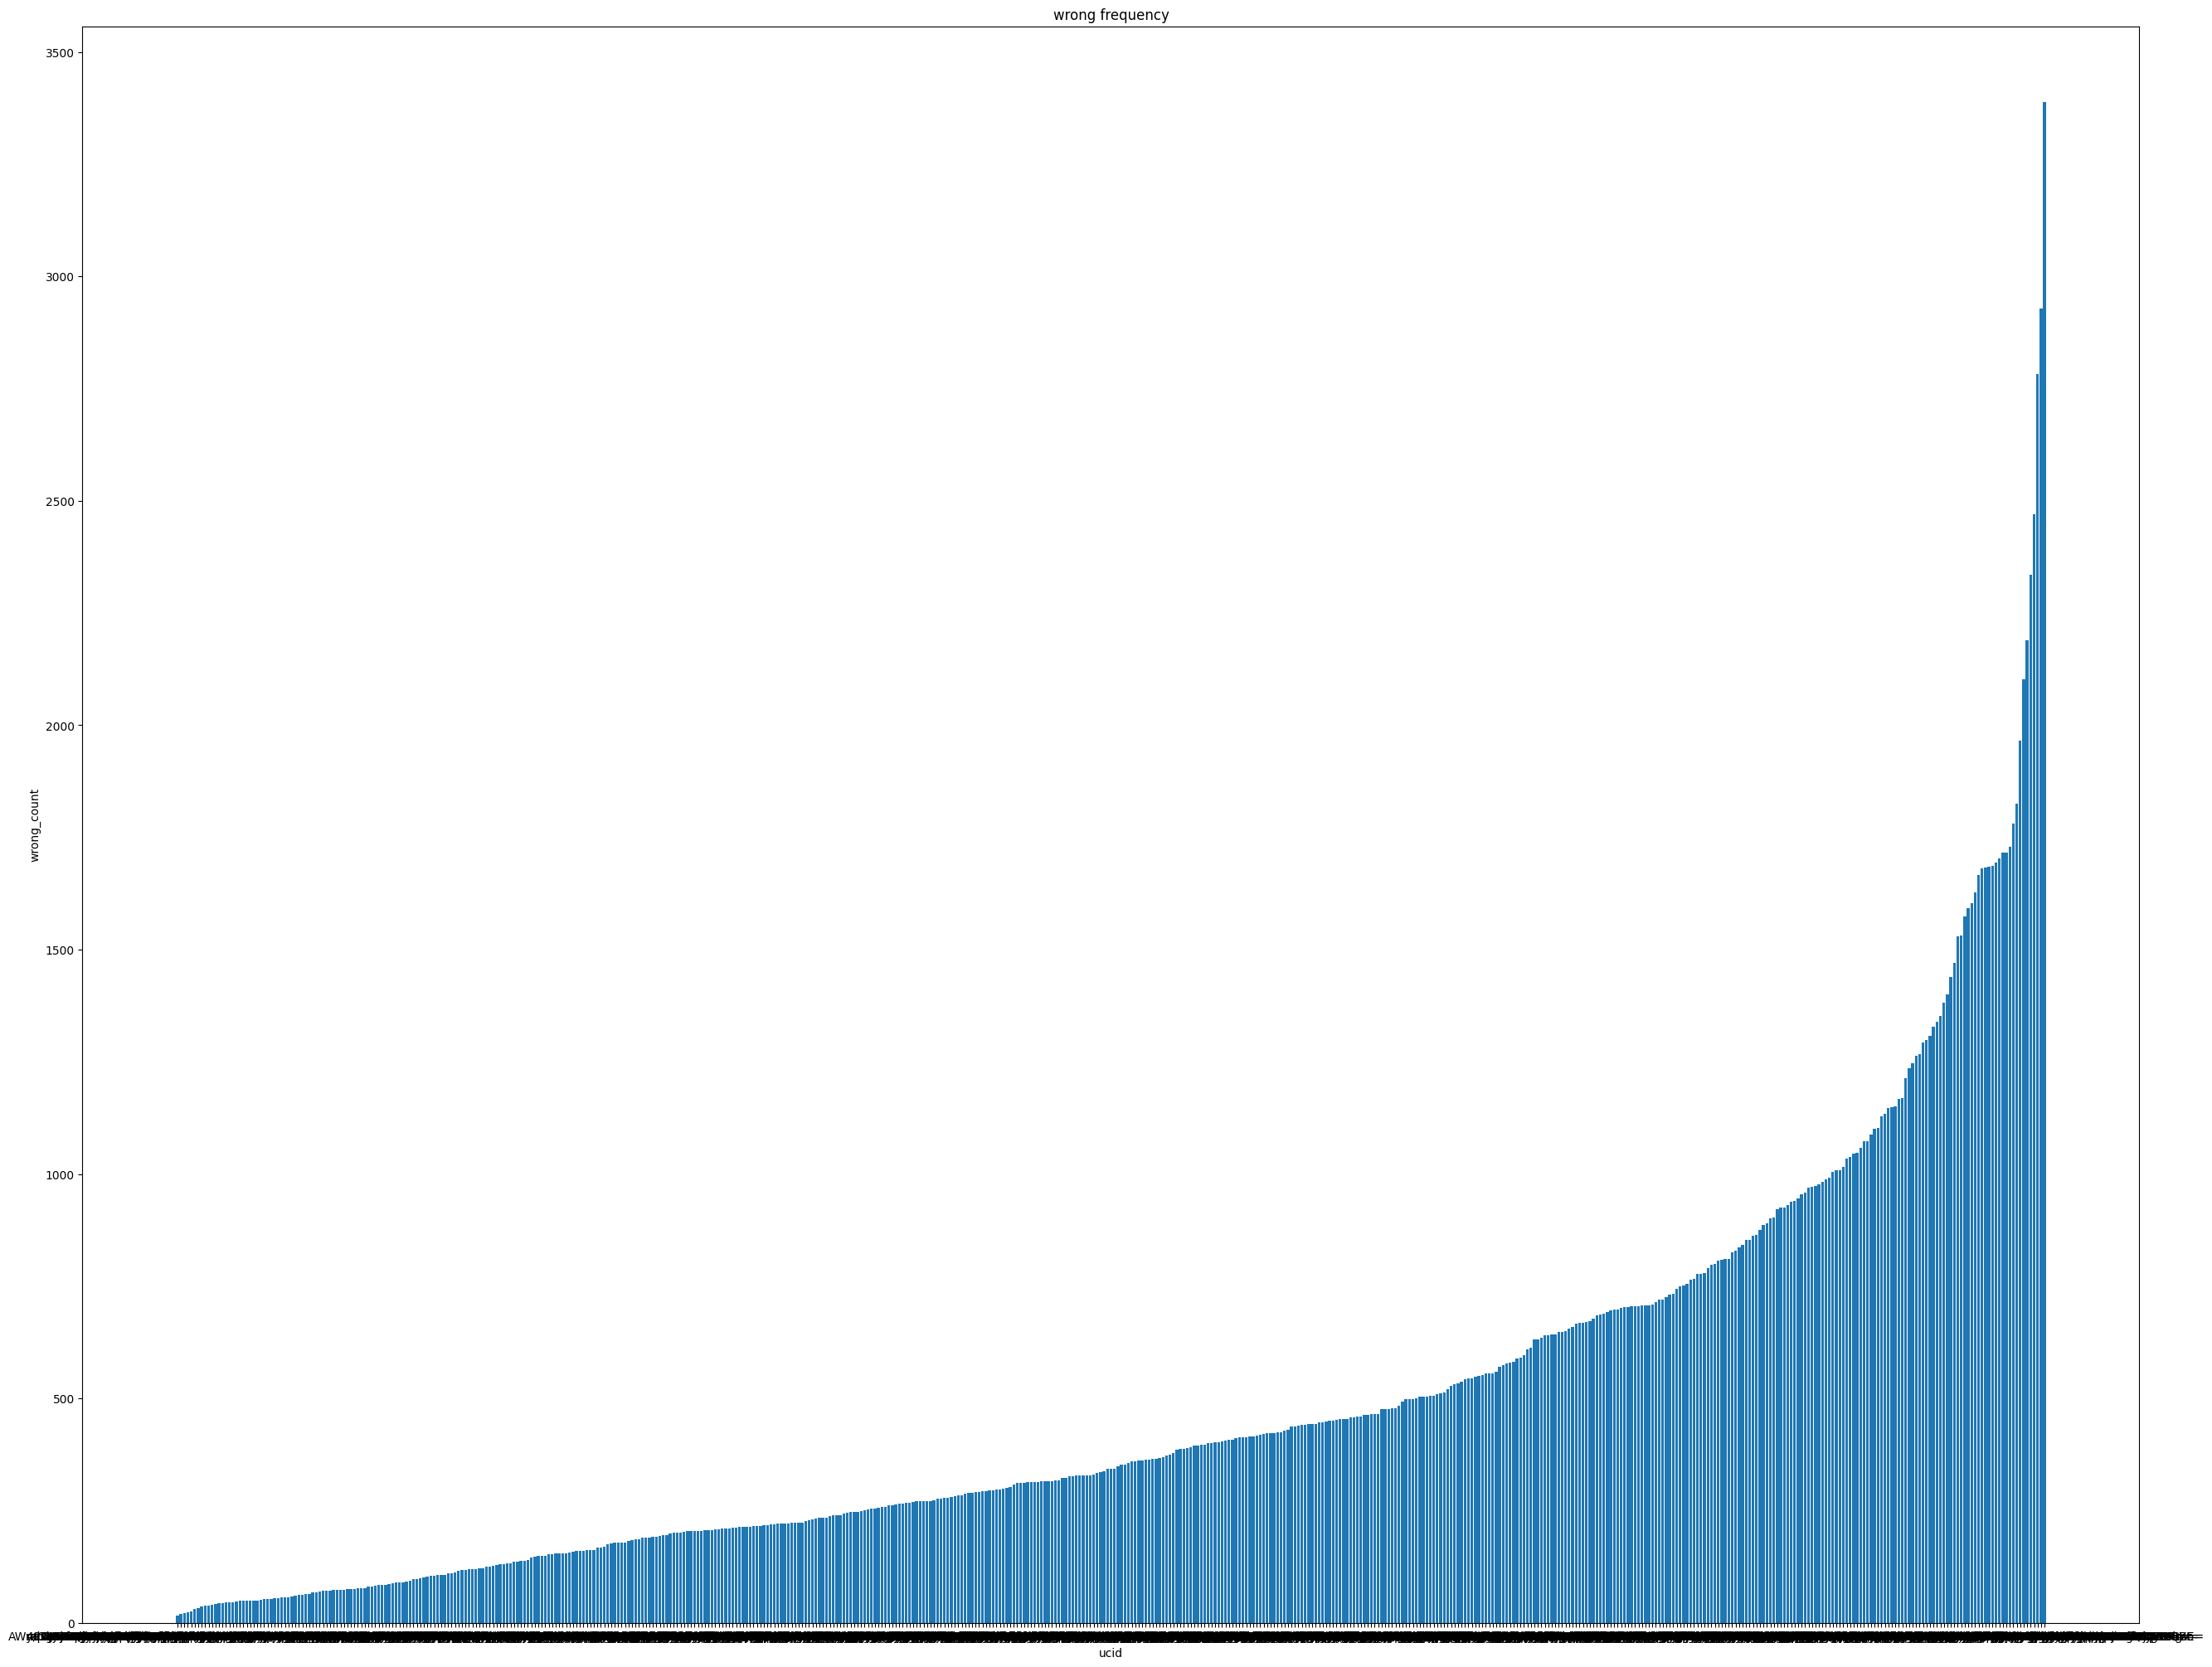

In [31]:
_elementaryWrongCount = _selectFrequentItems.StatisticsFrequent(_elementaryGroupedDf)
_juinorWrongCount = _selectFrequentItems.StatisticsFrequent(_juinorGroupedDf)

_elementaryFig = _selectFrequentItems.DrawBarPlot(_elementaryWrongCount, "ucid", "wrong_count", "wrong frequency")
_juinorFig = _selectFrequentItems.DrawBarPlot(_juinorWrongCount, "ucid", "wrong_count", "wrong frequency")

保存

In [32]:
FileSaver.SavePlot(_elementaryFig, _config["Paths"]["ELEMENTARY_WRONG_FREQ_PATH"])
FileSaver.SavePlot(_juinorFig, _config["Paths"]["JUNIOR_WRONG_FREQ_PATH"])

6. FPTree

In [33]:
# 決定最小支持度
_elementaryMinSupport = _elementaryWrongCount["wrong_count"].quantile(0.90) / len(_elementaryGroupedDf.index)
_juinorMinSupport = _juinorWrongCount["wrong_count"].quantile(0.90) / len(_juinorGroupedDf.index)

print("elementary min support: ", _elementaryMinSupport)
print("juinor min support: ", _juinorMinSupport)

# FPTree
_elementaryFrequentItems = _selectFrequentItems.FPTree(_elementaryGroupedDf, minSupport = _elementaryMinSupport)
_juinorFrequentItems = _selectFrequentItems.FPTree(_juinorGroupedDf, minSupport = _juinorMinSupport)

elementary min support:  0.037175181191444244
juinor min support:  0.04232646311458879


保存

In [34]:
FileSaver.SaveDataframe(_elementaryFrequentItems, _config["Paths"]["ELEMENTARY_FREQUENT_ITEMSET_PATH"])
FileSaver.SaveDataframe(_juinorFrequentItems, _config["Paths"]["JUNIOR_FREQUENT_ITEMSET_PATH"])

找出最大子集合

In [35]:
# 找出最大子集合
_elementaryFrequentItems = _selectFrequentItems.FindMaxSubset(_elementaryFrequentItems)
_juinorFrequentItems = _selectFrequentItems.FindMaxSubset(_juinorFrequentItems)

結果輸出

In [36]:
_elementaryFrequentItems = _selectFrequentItems.MapIdsToNames(_elementaryFrequentItems, _contentDf)
_juinorFrequentItems = _selectFrequentItems.MapIdsToNames(_juinorFrequentItems, _contentDf)

FileSaver.SaveDataframe(_elementaryFrequentItems, _config["Paths"]["ELEMENTARY_FREQUENT_ITEMSET_FILTER_PATH"])
FileSaver.SaveDataframe(_juinorFrequentItems, _config["Paths"]["JUNIOR_FREQUENT_ITEMSET_FILTER_PATH"])